In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FCPython
from pprint import pprint
import json

In [315]:
#read in data from my statsbomb file
with open('Statsbomb/data/events/WorldCup/7531.json') as f:
    data = json.load(f)

In [316]:
#Ability to look at all the data. I use this so I can look at the data while I am doing it. 
#We use pretty print to look at the json file cleanly.
#pprint(data)

In [317]:
minute = []
team = []
player = []
ball_type = []
location = []
xG = []
outcome = []
col_names = ['Minute','Team','Player','Type','Location','xG','Outcome']
for x in range(len(data)):
    if data[x]['type']['name'] == 'Shot':
        minute.append(data[x]['minute'])
        team.append(data[x]['possession_team']['name'])
        player.append(data[x]['player']['name'])
        ball_type.append(data[x]['type']['name'])
        location.append(data[x]['location'])
        xG.append(data[x]['shot']['statsbomb_xg'])
        outcome.append(data[x]['shot']['outcome']['name'])        

In [318]:
'''
Here we create the data frame with pandas. The data we read in will come in reverse in terms of the columns and rows so
we want to transpose it to flip columns and rows.
'''

df = pd.DataFrame(data=[minute,team,player,ball_type,location,xG,outcome],index=col_names)
df = df.T
df.head()

,Minute,Team,Player,Type,Location,xG,Outcome
0,0,Iceland,Gylfi Þór Sigurðsson,Shot,"[96.0, 53.0]",0.0214323,Off T
1,4,Argentina,Nicolás Hernán Otamendi,Shot,"[111.0, 43.0]",0.148515,Off T
2,7,Argentina,Nicolás Alejandro Tagliafico,Shot,"[105.0, 45.0]",0.0241709,Off T
3,8,Iceland,Alfreð Finnbogason,Shot,"[115.0, 57.0]",0.0608888,Off T
4,8,Iceland,Johann Berg Guðmunds­son,Shot,"[100.0, 54.0]",0.0436354,Blocked


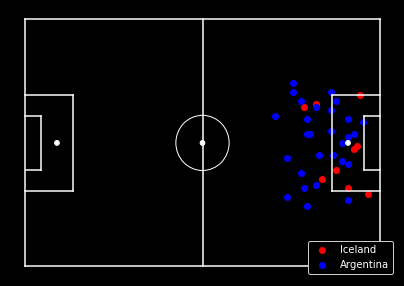

In [319]:
#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,82], color="white")
plt.plot([0,122],[82,82], color="white")
plt.plot([122,122],[82,0], color="white")
plt.plot([122,0],[0,0], color="white")
plt.plot([61,61],[0,82], color="white")

#Left Penalty Area
plt.plot([16.5,16.5],[57,25],color="white")
plt.plot([0,16.5],[57,57],color="white")
plt.plot([16.5,0],[25,25],color="white")

#Right Penalty Area
plt.plot([122,105.5],[57,57],color="white")
plt.plot([105.5,105.5],[57,25],color="white")
plt.plot([105.5,122],[25,25],color="white")

#Left 6-yard Box
plt.plot([0,5.5],[50,50],color="white")
plt.plot([5.5,5.5],[50,32],color="white")
plt.plot([5.5,0.5],[32,32],color="white")

#Right 6-yard Box
plt.plot([122,116.5],[50,50],color="white")
plt.plot([116.5,116.5],[50,32],color="white")
plt.plot([122,116.5],[32,32],color="white")

#Prepare Circles
centreCircle = plt.Circle((61,41),9.15,color="white",fill=False)
centreSpot = plt.Circle((61,41),0.8,color="white")
leftPenSpot = plt.Circle((11,41),0.8,color="white")
rightPenSpot = plt.Circle((111,41),0.8,color="white")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Tidy Axes
plt.axis('off')
plt.style.use('dark_background')
#plt.scatter(cx,cy,color='blue',label='Argentina')
#plt.scatter(mx,my,color='red',label='Iceland')

a_label = 'Argentina'
b_label = 'Iceland'
for x in range(len(df['Location'])):
    if df['Team'][x] == 'Argentina':
        plt.scatter(df['Location'][x][0],df['Location'][x][1],color='blue',label=a_label)
        a_label = "_nolegend_"
    if df['Team'][x] == 'Iceland':
        plt.scatter(df['Location'][x][0],df['Location'][x][1],color='red',label=b_label)
        b_label = "_nolegend_"
        
plt.legend(loc='lower right',facecolor='black',framealpha=1)
        